1. Hiện trạng di cư giữa các tỉnh thành tại Việt Nam năm 2021

a. Ghép dữ liệu địa lý và dữ liệu thống kê di cư

In [1]:
import pandas as pd
import geopandas as gpd
# import geoplot as gplt
# import geoplot.crs as gcrs
#import matplotlib.pyplot as plt
import folium

vn_map = gpd.read_file("diaphantinhenglish.geojson",
                       driver='GeoJSON')
vn_map

,Code,Name,geometry
0,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,AD01,Ba Ria - Vung Tau,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,AD01,Bac Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,AD01,Bac Kan,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,AD01,Bac Lieu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."
...,...,...,...
58,AD01,Tra Vinh,"MULTIPOLYGON (((106.33031 10.01151, 106.35479 ..."
59,AD01,Tuyen Quang,"MULTIPOLYGON (((105.21744 22.66234, 105.21968 ..."
60,AD01,Vinh Long,"MULTIPOLYGON (((106.02713 10.28630, 106.02695 ..."
61,AD01,Vinh Phuc,"MULTIPOLYGON (((105.58500 21.53527, 105.59105 ..."


In [2]:
vn_tctk = pd.read_csv('tctk.csv', sep=',')
dat = vn_map.set_index('Name').join(vn_tctk.set_index('Name'))
dat.to_csv('dicu.csv')

b. Hiện trạng di cư theo tỉnh (di cư thuần = tỷ lệ nhập cư - tỷ lệ xuất cư)

In [3]:
# import mapclassify as mc
# import numpy as np

# k=6
# scheme = mc.EqualInterval(dat['di_cu_2021'], k=k)

# ### calculate label legend to deal with negative values
# lower = min(dat['di_cu_2021'])
# upper = max(dat['di_cu_2021'])
# itv = (upper - lower)/k

# mark_point=[lower]
# for i in range(k):
#     mark_point.append('{:.2f}'.format(lower + (i+1)*itv))
# # mark_point

# legend_label=[]
# for i in range(len(mark_point)-1):
#     legend_label.append('{0} to {1}'.format(mark_point[i], mark_point[i+1]))
 

# gplt.choropleth(
#     dat,
#     hue=dat['di_cu_2021'], 
#     cmap='bwr', 
#     linewidth=1,
#     edgecolor='black',
#     legend=True, 
#     legend_labels=legend_label,
#     legend_kwargs={'loc': 'center right'},
#     projection=gcrs.AlbersEqualArea(),
#     scheme=scheme,
#     figsize=(10,10)
# )
# plt.title("Vietnam Migration in 2021",loc='center')

In [4]:
# def my_colormap(value):  # scalar value defined in 'column'
#     if value > 0:
#         return "green"
#     return "red"

m = dat.explore(
     column="di_cu_2021",  # make choropleth based on "BoroName" column
     cmap = 'bwr',
     # cmap = my_colormap,
     tooltip=['Name','di_cu_2021'],
     scheme='EqualInterval',  # use mapclassify's natural breaks scheme
     k=6,
     # legend=False,
     legend=True, # show legend
     legend_kwds=dict(colorbar=False, caption='Migration rate (%)'), # do not use colorbar
     style_kwds=dict(color="black"),
     name="provinces" # name of the layer in the map
)

folium.TileLayer('CartoDB positron', control=True).add_to(m)  # use folium to add alternative tiles
# folium.LayerControl().add_to(m)  # use folium to add layer control
m  # show map

ImportError: The 'folium', 'matplotlib' and 'mapclassify' packages are required for 'explore()'. You can install them using 'conda install -c conda-forge folium matplotlib mapclassify' or 'pip install folium matplotlib mapclassify'.

2. Đặc điểm của người di cư

a. Tuổi

In [ ]:
ages = pd.read_csv('age.csv', sep=',')
ages

,ages,percent
0,5->9,7.9
1,10->14,5.5
2,15->19,6.3
3,20->24,12.9
4,25->29,18.3
5,30->34,15.0
6,35->39,11.0
7,40->44,6.8
8,45->49,5.0
9,50->54,3.1


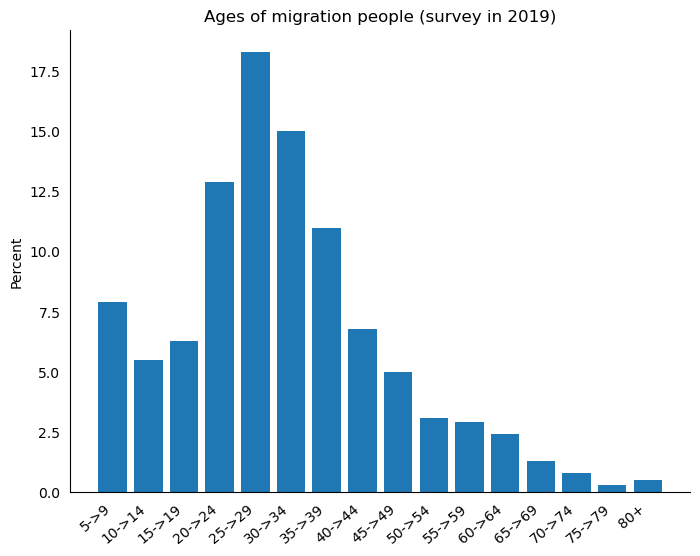

In [ ]:
fig, ax = plt.subplots(figsize =(8,6))
 
# Bar Plot
ax.bar(ages['ages'], ages['percent'])

# Show top values
# ax.invert_yaxis()

# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add Plot Title
ax.set_title('Ages of migration people (survey in 2019)',
             loc ='center', )

ax.set_ylabel("Percent")

plt.xticks(rotation=40, ha='right')
# Show Plot
plt.show()

b. Trình độ

In [ ]:
school = pd.read_csv('school.csv', sep=',')
school

,Ages,at shool,stop learning,never went to school
0,6->10,97.6,1.4,1.0
1,11->18,55.7,43.8,0.5


<AxesSubplot: title={'center': 'Education of migrate versus stay'}, xlabel='Ages'>

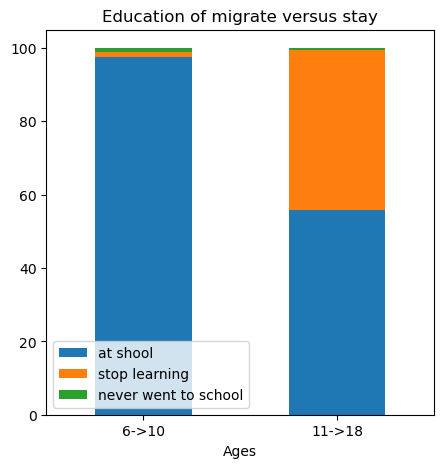

In [ ]:
school.plot(
    x = 'Ages',
    kind = 'bar',
    stacked = True,
    title = 'Education of migrate versus stay',
    mark_right = True,
    rot = 0,
    figsize = (5,5))

In [ ]:
training = pd.read_csv('training.csv', sep=',')
training

,group,percent
0,no professional knowledge,62.8
1,elementary level,7.6
2,intermediate level,4.6
3,college degree,5.9
4,university degree and above,19.1


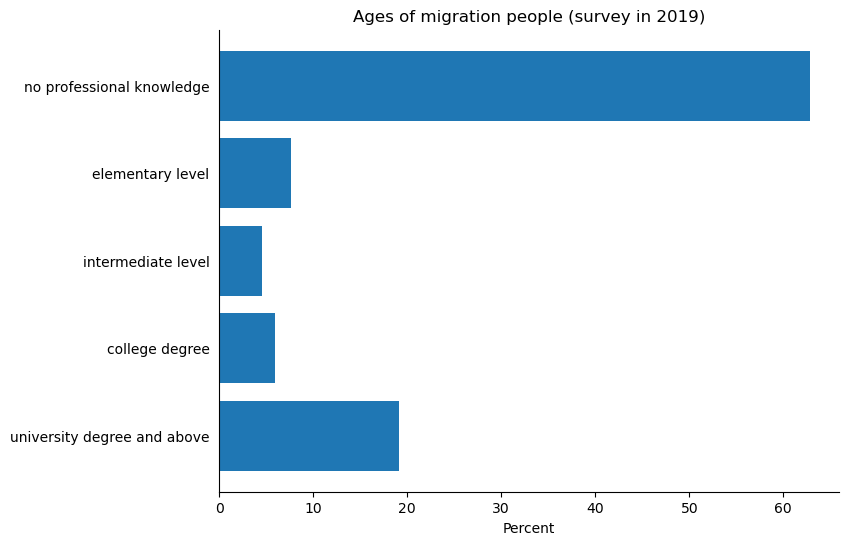

In [ ]:
fig, ax = plt.subplots(figsize =(8,6))
 
# Bar Plot
ax.barh(training['group'], training['percent'])

# Show top values
ax.invert_yaxis()

# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
# ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add Plot Title
ax.set_title('Ages of migration people (survey in 2019)',
             loc ='center', )

ax.set_xlabel("Percent")

# plt.xticks(rotation=40, ha='right')
# Show Plot
plt.show()

c. Giới tính

In [ ]:
gender = pd.read_csv('gender.csv', sep=',')
gender

,group,male,female
0,migrate,48.2,51.8
1,stay,49.9,50.1


<AxesSubplot: title={'center': 'Gender structure of migrate versus stay'}, xlabel='group'>

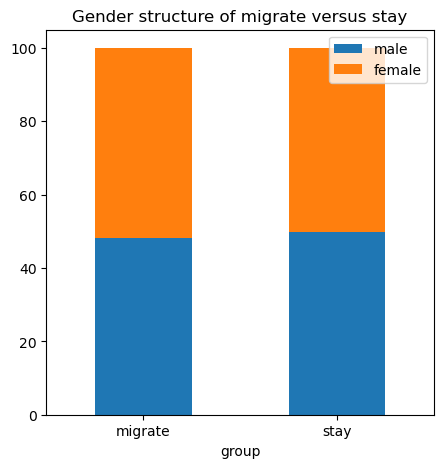

In [ ]:
gender.plot(
    x = 'group',
    kind = 'bar',
    stacked = True,
    title = 'Gender structure of migrate versus stay',
    mark_right = True,
    rot = 0,
    figsize = (5,5))

d. Tình trạng hôn nhân

In [ ]:
marriage = pd.read_csv('marriage.csv', sep=',')
marriage

,marriage_status,percent
0,not married,22.9
1,married,68.6
2,widow/widower,6.3
3,divorce,1.9
4,separated,0.3


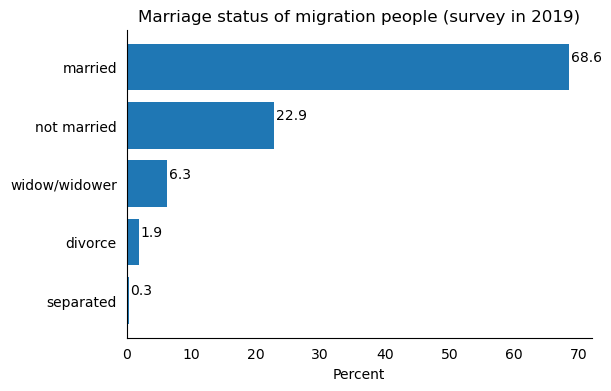

In [ ]:
fig, ax = plt.subplots(figsize =(6, 4))
 
# Horizontal Bar Plot
ax.barh(marriage.sort_values(by='percent')['marriage_status'], marriage.sort_values(by='percent')['percent'])

# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, 
             color ='black')

# Add Plot Title
ax.set_title('Marriage status of migration people (survey in 2019)',
             loc ='center', )

ax.set_xlabel("Percent")

# Show Plot
plt.show()

3. Tương quan giữa di cư và kinh tế

C:\Users\hong.dao\AppData\Local\Temp\ipykernel_33592\3960980385.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[0].grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.3)
C:\Users\hong.dao\AppData\Local\Temp\ipykernel_33592\3960980385.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[1].grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.3)
C:\Users\hong.dao\AppData\Local\Temp\ipykernel_33592\3960980385.py:38: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[2].grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.5)


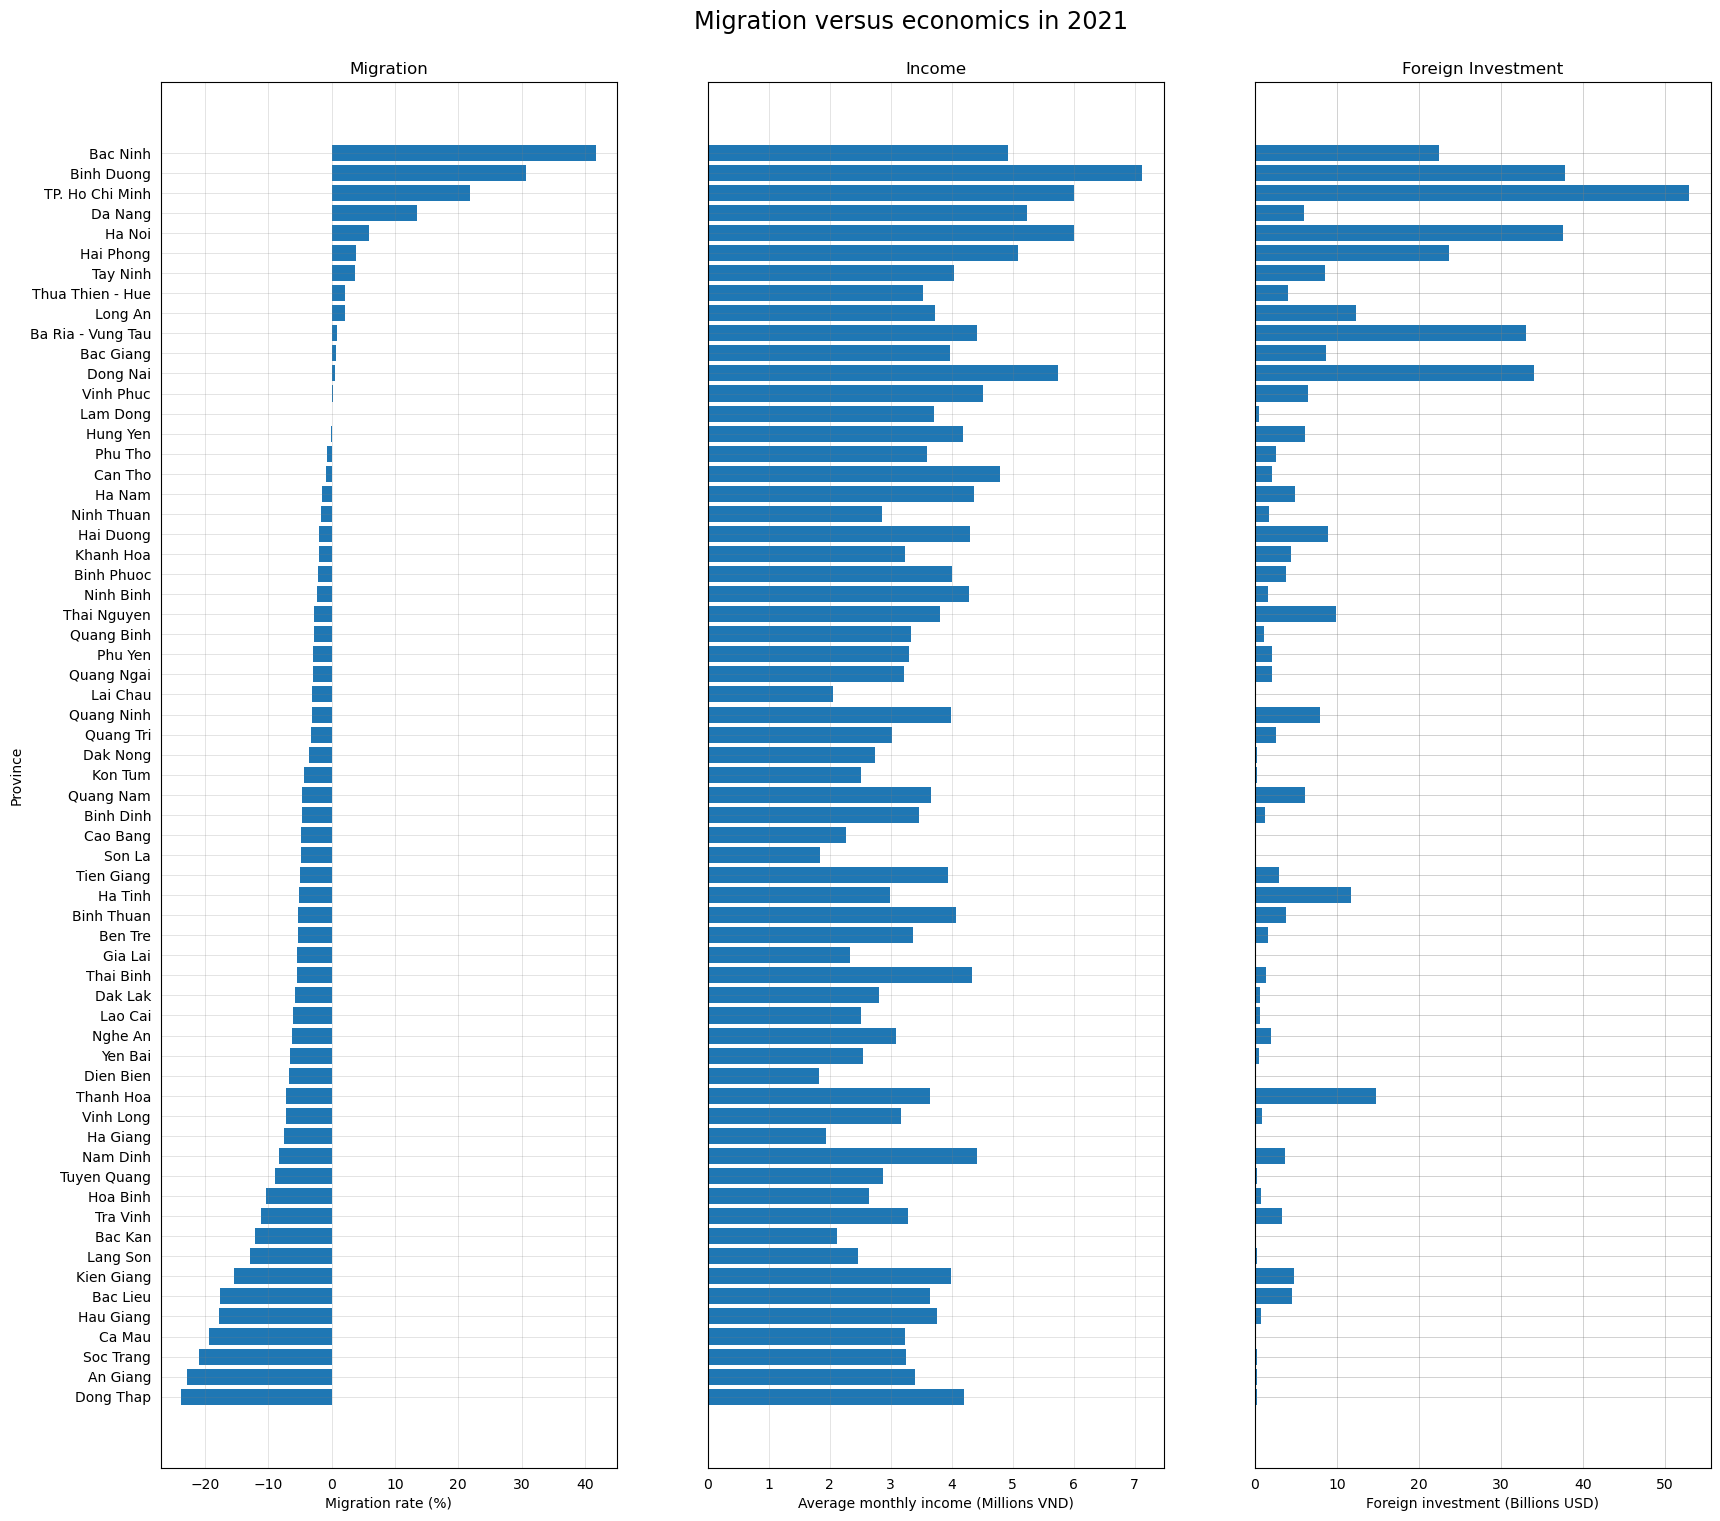

In [ ]:
# dat_sorted = dat.sort_values(by='di_cu_2021').copy()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (20,18), sharey=True)

# Remove axes splines
# for s in ['top', 'bottom', 'left', 'right']:
#     ax.spines[s].set_visible(False)

############################ migration
ax[0].barh(dat.sort_values(by='di_cu_2021').index.values, dat.sort_values(by='di_cu_2021')['di_cu_2021']) 

# Remove x, y Ticks
ax[0].xaxis.set_ticks_position('none')
ax[0].yaxis.set_ticks_position('none')

# Add x, y gridlines
ax[0].grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.3)

ax[0].set_title("Migration")
ax[0].set_xlabel("Migration rate (%)")
ax[0].set_ylabel("Province")

########################### Avg monthly income
ax[1].barh(dat.sort_values(by='di_cu_2021').index.values, dat.sort_values(by='di_cu_2021')['thu_nhap_2021']/1000) 
ax[1].xaxis.set_ticks_position('none')
ax[1].yaxis.set_ticks_position('none')
# ax[1].yaxis.set_visible(False)
ax[1].grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.3)

ax[1].set_title("Income")
ax[1].set_xlabel("Average monthly income (Millions VND)")

########################### Foreign invesment
ax[2].barh(dat.sort_values(by='di_cu_2021').index.values, dat.sort_values(by='di_cu_2021')['von_DTNN_2021']/1000)
ax[2].xaxis.set_ticks_position('none')
ax[2].yaxis.set_ticks_position('none')
# ax[2].yaxis.set_visible(False)
ax[2].grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.5)

ax[2].set_title("Foreign Investment")
ax[2].set_xlabel("Foreign investment (Billions USD)")

plt.suptitle('Migration versus economics in 2021', x=0.5, y=0.92, size='xx-large')
plt.show()

In [ ]:
############# Thu nhap theo tỉnh

# ax = dat.plot(
#      column="thu_nhap_2021",  # make choropleth based on "BoroName" column
#      cmap = 'cividis',
#      # tooltip=['Name','thu_nhap_2021'],
#      scheme='EqualInterval',  # use mapclassify's natural breaks scheme
#      k=6,
#      legend=True, # show legend
#      figsize=(15, 15),
# )
# ax.set_axis_off()
# ax.set_title("Average monthly income in 2021")


4. Tương quan giữa di cư và giáo dục - đào tạo

C:\Users\hong.dao\AppData\Local\Temp\ipykernel_33592\2045269437.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[0].grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.3)
C:\Users\hong.dao\AppData\Local\Temp\ipykernel_33592\2045269437.py:31: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[1].grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.3)
C:\Users\hong.dao\AppData\Local\Temp\ipykernel_33592\2045269437.py:44: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[2].grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.5)


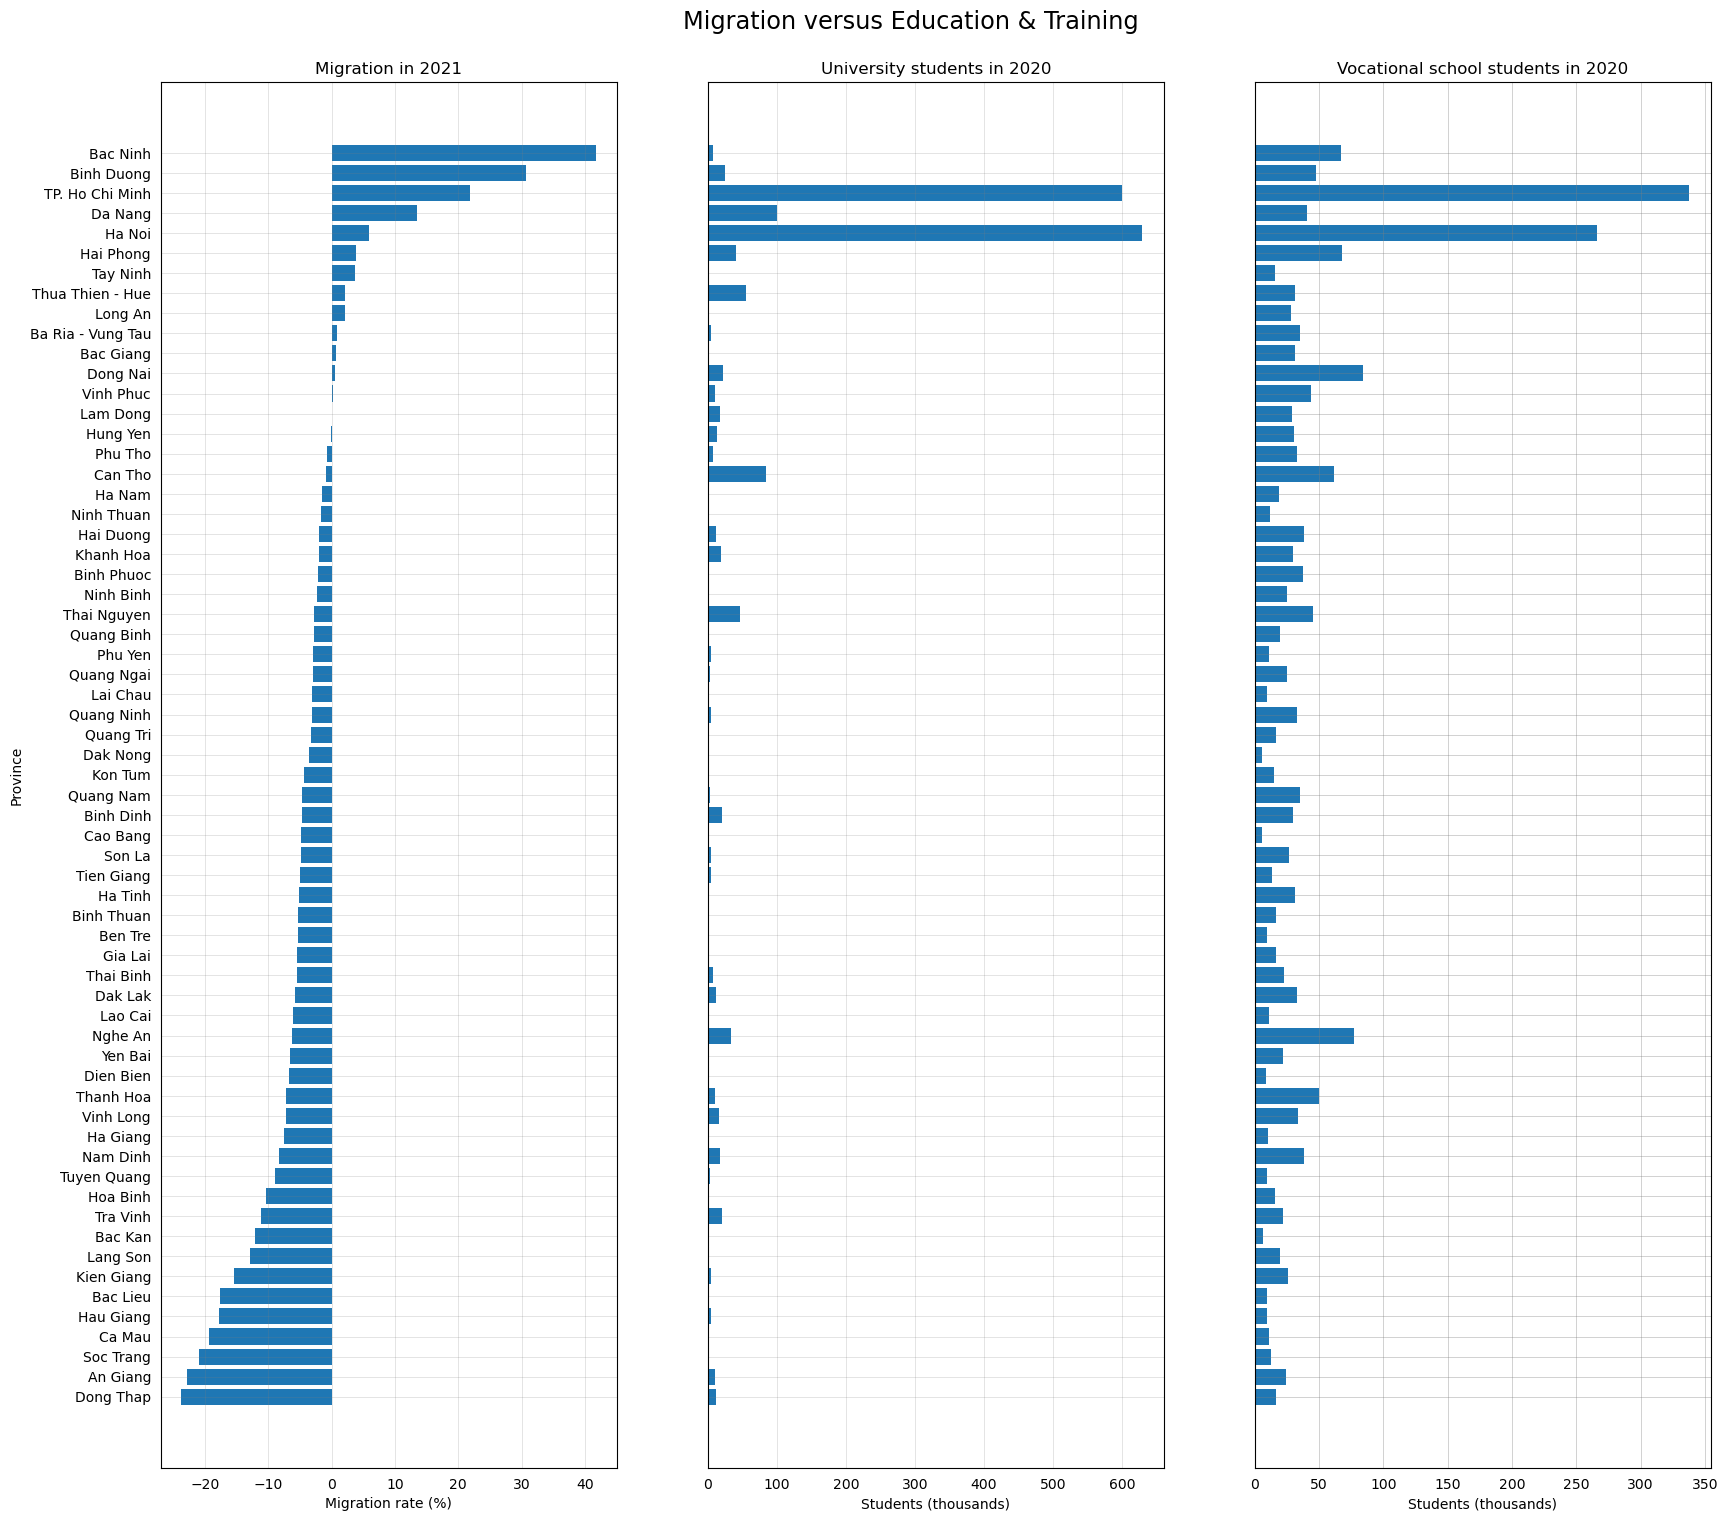

In [ ]:
# dat_sorted = dat.sort_values(by='di_cu_2021').copy()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (20,18), sharey=True)

# Remove axes splines
# for s in ['top', 'bottom', 'left', 'right']:
#     ax.spines[s].set_visible(False)

############################## migration rate
ax[0].barh(dat.sort_values(by='di_cu_2021').index.values, dat.sort_values(by='di_cu_2021')['di_cu_2021']) 

# Remove x, y Ticks
ax[0].xaxis.set_ticks_position('none')
ax[0].yaxis.set_ticks_position('none')

# Add x, y gridlines
ax[0].grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.3)

ax[0].set_title("Migration in 2021")
ax[0].set_xlabel("Migration rate (%)")
ax[0].set_ylabel("Province")

############################### University Students
ax[1].barh(dat.sort_values(by='di_cu_2021').index.values, dat.sort_values(by='di_cu_2021')['SV_DH_2020']/1000) 

# Remove x, y Ticks
ax[1].xaxis.set_ticks_position('none')
ax[1].yaxis.set_ticks_position('none')

# Add x, y gridlines
ax[1].grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.3)

ax[1].set_title("University students in 2020")
ax[1].set_xlabel("Students (thousands)")

############################### Vocational School students
ax[2].barh(dat.sort_values(by='di_cu_2021').index.values, dat.sort_values(by='di_cu_2021')['SV_nghe_2020']/1000) 

# Remove x, y Ticks
ax[2].xaxis.set_ticks_position('none')
ax[2].yaxis.set_ticks_position('none')

# Add x, y gridlines
ax[2].grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.5)

ax[2].set_title("Vocational school students in 2020")
ax[2].set_xlabel("Students (thousands)")

plt.suptitle('Migration versus Education & Training', x=0.5, y=0.92, size='xx-large')
plt.show()

5. Kết quả khảo sát lý do di cư theo tổng điều tra dân số và nhà ở năm 2019

In [ ]:
reason = pd.read_csv('reason.csv', sep=',')
reason

,reason,percent
0,new job,44.3
1,losse job,0.5
2,move new house with family,37.9
3,marriage,7.2
4,education,9.0
5,others,1.0


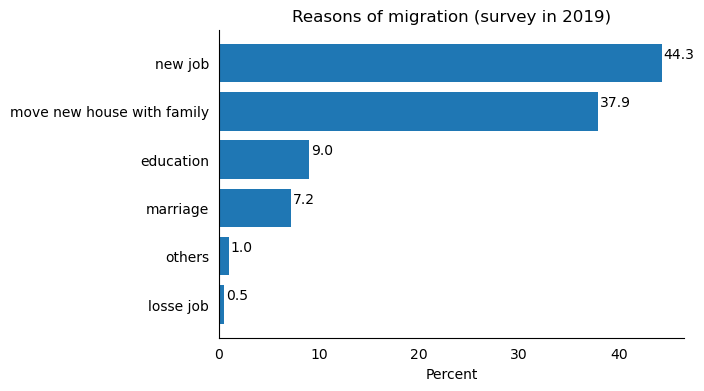

In [ ]:
fig, ax = plt.subplots(figsize =(6, 4))
 
# Horizontal Bar Plot
ax.barh(reason.sort_values(by='percent')['reason'], reason.sort_values(by='percent')['percent'])
 
# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, 
             color ='black')

# Add Plot Title
ax.set_title('Reasons of migration (survey in 2019)',
             loc ='center', )

ax.set_xlabel("Percent")

# Show Plot
plt.show()